In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

from Lib.BEM_Solver.BEM_2D import *
from Lib.Domain_Decomposition.Coupling_Main import *

# Domain decomposition method (DDM)
## Test1 of L-shape domain problem in IJNME

<br />
<img align="left" src="img/Test1.png" alt="Drawing" style="width: 600px;"/>
<br /><br /><br />

### Step1. Setup BEM subdomains

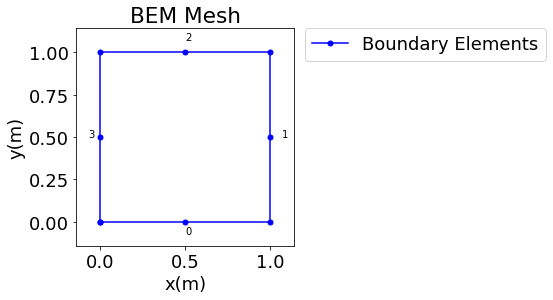

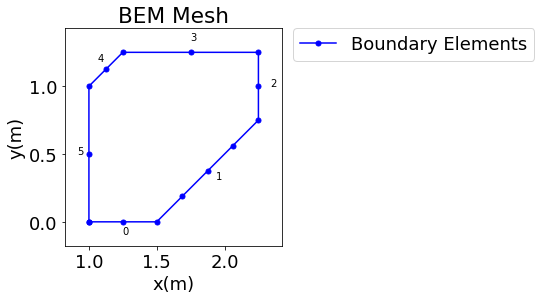

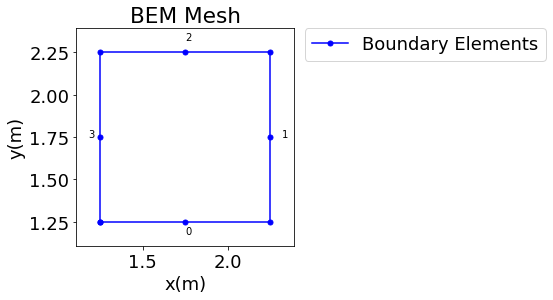

In [2]:
#####Subdomain1########
BEM_Case1=BEM2D()

#1.Build Mesh
Boundary_vert=[(0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 1.0)] #Anti-clock wise for internal domain
element_esize=1

BEM_Case1.set_Mesh(Boundary_vert,[],element_esize,[],Type="Quad")

#2.Set Boundary condition
bc0=[(3,100)]
bc1=[(1,0)]

BEM_Case1.set_BoundaryCondition(DirichletBC=bc0)
#BEM_Case1.print_debug()

#####Subdomain2########
BEM_Case2=BEM2D()

#1.Build Mesh
Boundary_vert=[(1.0, 0.0), (1.5, 0.0), (2.25, 0.75),(2.25,1.25),(1.25,1.25),(1.0, 1.0)] #Anti-clock wise for internal domain
element_esize=1

BEM_Case2.set_Mesh(Boundary_vert,[],element_esize,[],Type="Quad")

#2.Set Boundary condition
bc0=[(1,10)]
bc1=[(5,0),(3,0)]
#bc1=[(3,1)]
BEM_Case2.set_BoundaryCondition(DirichletBC=bc0)
#BEM_Case2.print_debug()

#####Subdomain3########
BEM_Case3=BEM2D()

#1.Build Mesh
Boundary_vert=[(1.25, 1.25), (2.25, 1.25), (2.25, 2.25), (1.25, 2.25)] #Anti-clock wise for internal domain
element_esize=1

BEM_Case3.set_Mesh(Boundary_vert,[],element_esize,[],Type="Quad")

#2.Set Boundary condition
bc0=[(2,100)]
bc1=[(0,0)]
#bc1=[(3,1)]
BEM_Case3.set_BoundaryCondition(DirichletBC=bc0)
#BEM_Case2.print_debug()

### Step2. Setup iterative coupling solver

-----Mesh Info-----
Total Number of Elements: 15
Total Number of Subdomains: 3


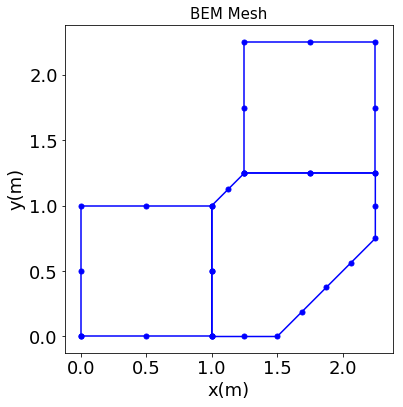

In [3]:
BEMCases=[BEM_Case1,BEM_Case2,BEM_Case3] #BEM_Case1,BEM_Case2 are coupled
CommonEdges=[[(1.0, 0.0), (1.0, 1.0)],
             [(1.25, 1.25), (2.25, 1.25)]
            ]
Connects=[[(1,0)],  #BEM_case1 connect with BEM_case2(1) at its face 1 
          [(0,0),(2,1)],  #BEM_case2 coonect with BEM_case1(0) at its face 3
          [(1,1)]] 
BEMSolver=DDM_Solver(BEMobj=BEMCases,Intersection=CommonEdges,Connection=Connects)

### Step3. Parallel Robin-Robin Algorithm

-----Mesh Info-----
Total Number of Elements: 15
Total Number of Subdomains: 3


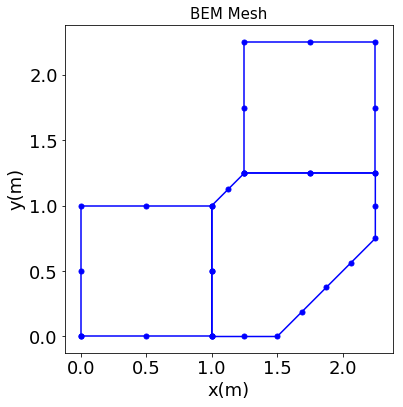

1	1.0		alpha:	0.5
2	0.481072573623		alpha:	0.5
3	0.409908772231		alpha:	0.9991393019
4	0.22598734418		alpha:	1.00576044167
5	0.209430302096		alpha:	2.20880653287
6	0.0664788163809		alpha:	2.23868896741
7	0.0304659880643		alpha:	0.659759200499
8	0.00286358641705		alpha:	0.633119879252
9	0.00143890382646		alpha:	0.75468873712
10	0.00682602393327		alpha:	4.25625652244
11	0.000569545574148		alpha:	4.31494310069
12	0.000397583570972		alpha:	0.697766751915
13	0.00010423038183		alpha:	0.564869401525
14	2.46925401791e-05		alpha:	0.581916600404
15	7.7253174599e-05		alpha:	2.35846045197
16	4.02332528694e-06		alpha:	2.36890054558
Converged at 16 Steps! TOL= 1e-05
Dirichelt [ 56.93120902  54.3601846   51.10619678]
Robin [ 20.24344431   9.44476065  -7.2023679 ]


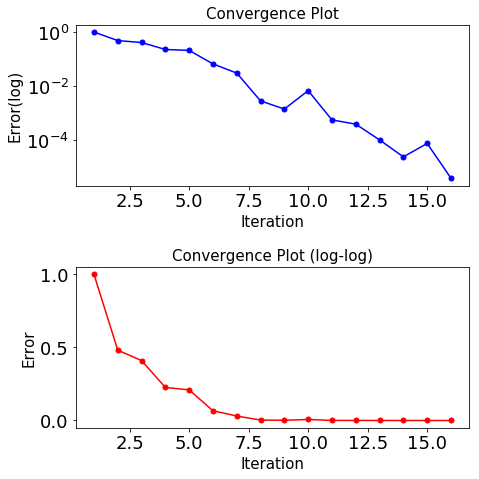

In [4]:
BEMSolver=DDM_Solver(BEMobj=BEMCases,Intersection=CommonEdges,Connection=Connects)
BEMSolver.Solve_Iter(Method="P-RR",TOL=1e-5,alpha=0.5,opt=1) #P-NN

### Step3. Parallel Neumann-Neumann Algorithm

-----Mesh Info-----
Total Number of Elements: 15
Total Number of Subdomains: 3


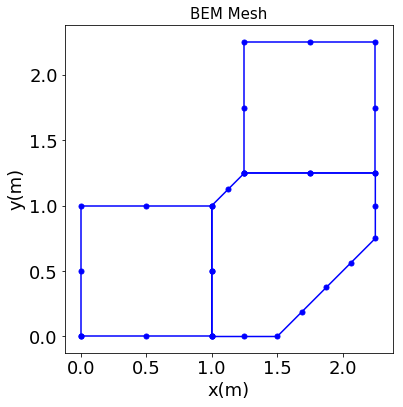

1	1.25464395824		alpha:	0.5
2	0.0961911470447		alpha:	0.5
3	0.0161908792309		alpha:	0.124278032395
4	0.152960402696		alpha:	-1.35565021604
5	0.096108156056		alpha:	0.791103668207
6	0.0988025904278		alpha:	2.11792356905
7	0.0117136431944		alpha:	2.04202147574
8	0.00423485505832		alpha:	0.726878202591
9	0.00134969312465		alpha:	0.394310510734
10	0.00245321775765		alpha:	1.08602830496
11	0.00191312041593		alpha:	2.09933863853
12	0.000607457138772		alpha:	2.0504757917
13	0.000246341090178		alpha:	0.846605377779
14	5.55037948471e-05		alpha:	0.265611106806
15	0.000236328775598		alpha:	1.47125319145
16	9.73547802555e-05		alpha:	0.793082183557
17	2.24579504924e-05		alpha:	0.285144475614
18	0.000166949848884		alpha:	2.4198031245
19	4.98705316184e-05		alpha:	0.538333341978
20	1.21089715324e-05		alpha:	0.343003980138
21	8.45478380907e-05		alpha:	2.6074897807
22	2.1576652823e-05		alpha:	0.470922507458
23	4.75840310174e-06		alpha:	0.310774286052
Converged at 23 Steps! TOL= 1e-05
Dirichelt [-0.00367

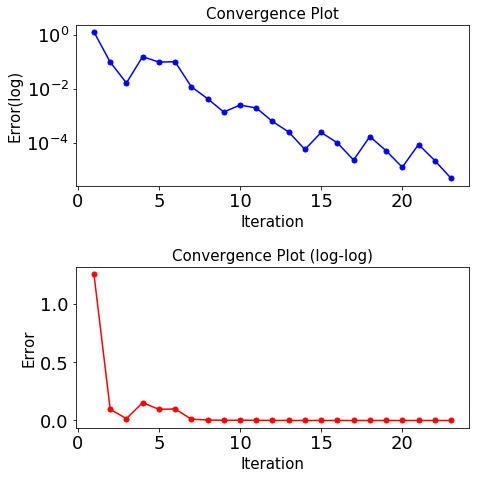

In [5]:
BEMSolver=DDM_Solver(BEMobj=BEMCases,Intersection=CommonEdges,Connection=Connects)
BEMSolver.Solve_Iter(Method="P-NN",TOL=1e-5,alpha=0.5,opt=1) #P-NN

### Step3. Parallel Dirichlet-Dirichlet Algorithm

-----Mesh Info-----
Total Number of Elements: 15
Total Number of Subdomains: 3


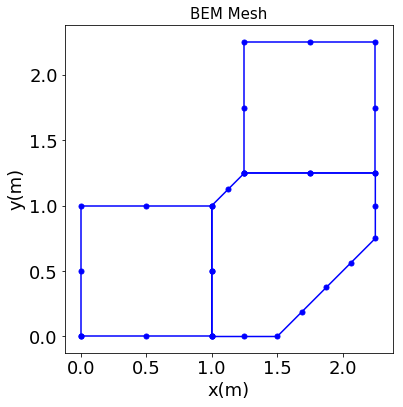

1	0.373391776725		alpha:	0.5
2	0.713053226511		alpha:	0.5
3	1.08095197408		alpha:	0.106451371423
4	0.339603167725		alpha:	0.0796735533506
5	0.0811078123659		alpha:	0.0658224796511
6	0.0156265438972		alpha:	0.0695285851368
7	0.0146825222221		alpha:	0.131277955248
8	0.000294552673536		alpha:	0.132435375357
9	9.82188937953e-05		alpha:	0.071710902934
10	9.82708966902e-06		alpha:	0.064527701403
Converged at 10 Steps! TOL= 1e-05
Dirichelt [ 56.93122996  54.36020437  51.10621143]
Neumann [-36.69184126 -44.91337228 -58.3125539 ]


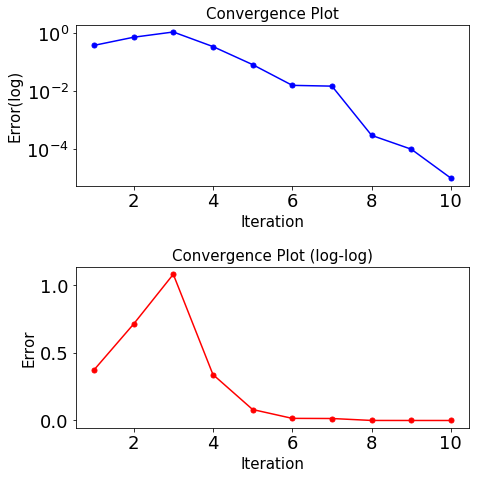

In [6]:
BEMSolver=DDM_Solver(BEMobj=BEMCases,Intersection=CommonEdges,Connection=Connects)
BEMSolver.Solve_Iter(Method="P-DD",TOL=1e-5,alpha=0.5,opt=1) #P-DD

### Step3. Sequential Dirichlet-Neumann Algorithm

-----Mesh Info-----
Total Number of Elements: 15
Total Number of Subdomains: 3


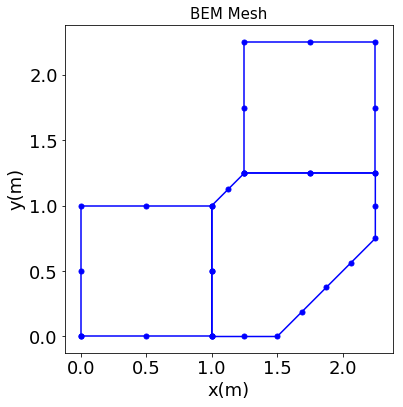

1	1.0		alpha:	0.5
2	0.918758950236		alpha:	0.5
3	0.40497179788		alpha:	0.629394711061
4	0.0512818506994		alpha:	0.724281650197
5	0.00882855281446		alpha:	0.639392225774
6	0.000589144115341		alpha:	0.623812630738
7	5.06015607059e-05		alpha:	0.604748053505
8	8.35275071906e-06		alpha:	0.54692435132
Converged at 8 Steps! TOL= 1e-05
Dirichelt [ 37.76109193  36.41665662  34.69852077]
Neumann [-21.15582616 -26.77013431 -35.58543101]


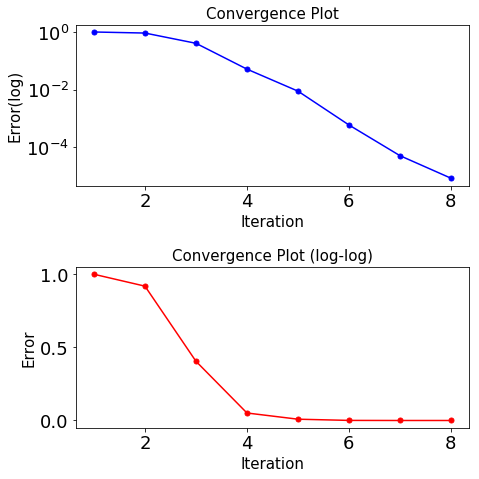

In [7]:
BEMSolver=DDM_Solver(BEMobj=BEMCases,Intersection=CommonEdges,Connection=Connects)
BEMSolver.Solve_Iter(Method="S-DN",TOL=1e-5,alpha=0.5,opt=1) #p-dn

### Step4. Solution Visulization & Verification

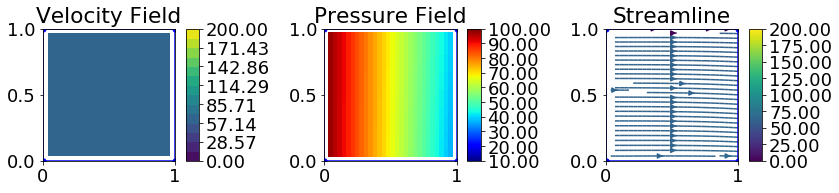

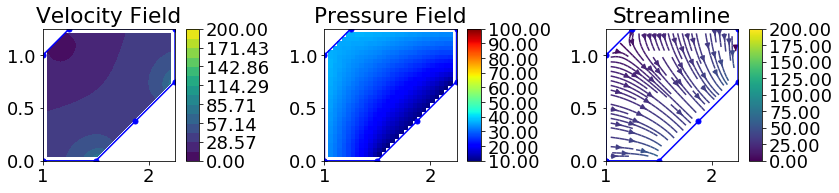

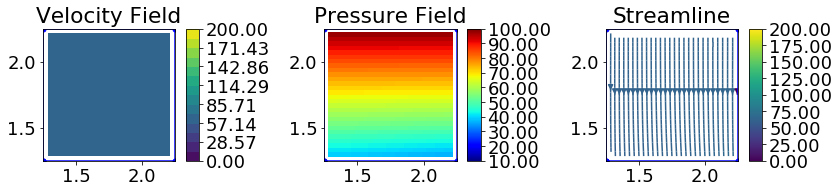

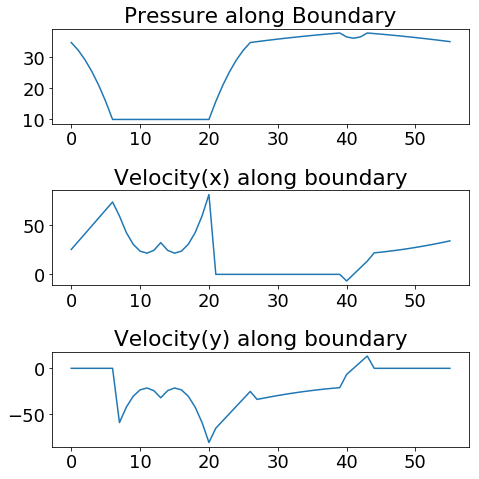

In [8]:
#Pressure and velocity contour results
PUV1=BEM_Case1.plot_Solution(v_range=(0,200),p_range=(10,100))
PUV2=BEM_Case2.plot_Solution(v_range=(0,200),p_range=(10,100))
PUV2=BEM_Case3.plot_Solution(v_range=(0,200),p_range=(10,100))
#Pressure and velocity along the boundary
P=BEM_Case2.plot_SolutionBD()